In [23]:
import os
import json
import string
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from synthesized.testing import synthetic_distributions as syn_dist
from synthesized.testing.evaluate_sparsity_regimes import missing_patterns, synthesize_and_plot_results

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3139-2D31-322D-B531
Expires at: 2019-12-31 00:00:00


In [3]:
def plot_dist(data: pd.DataFrame, data_missing: pd.DataFrame):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax1.set_title('orig')
    ax2.set_title('missing')
    sns.scatterplot(x='x', y='y', data=data, ax=ax1, color=sns.color_palette()[0])
    sns.scatterplot(x='x', y='y', data=data_missing, ax=ax2, color=sns.color_palette()[1])
    plt.show()
    
def plot_heatmap(data1: pd.DataFrame, data2: pd.DataFrame):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax1.set_title('orig')
    ax2.set_title('synth')
    
    crosstab1 = pd.crosstab(data1['x'], columns=[data1['y']]).apply(lambda r: r/r.sum(), axis=1)
    sns.heatmap(crosstab1, vmin=0.0, vmax=1.0, ax=ax1)
    
    crosstab2 = pd.crosstab(data2['x'], columns=[data2['y']]).apply(lambda r: r/r.sum(), axis=1)
    sns.heatmap(crosstab2, vmin=0.0, vmax=1.0, ax=ax2)
            

============= MCAR =============
Prop. NaNs:
x    0.4971
y    0.5029
dtype: float64


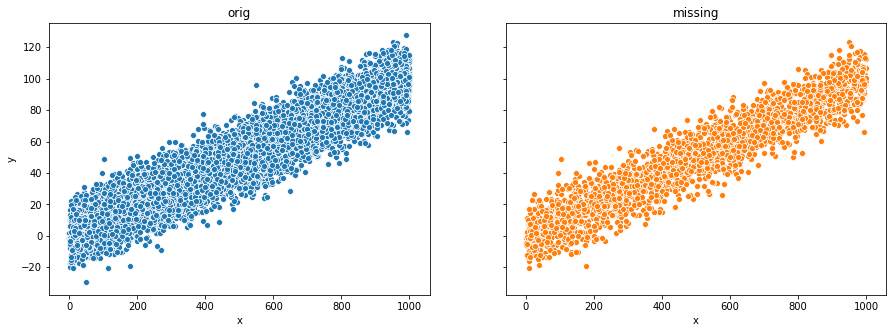

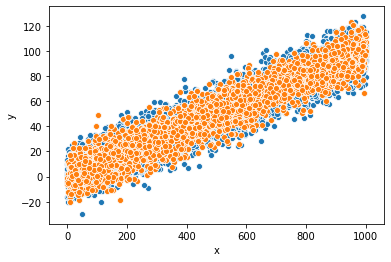

============= MAR =============
Prop. NaNs:
x    0.5001
y    0.5001
dtype: float64


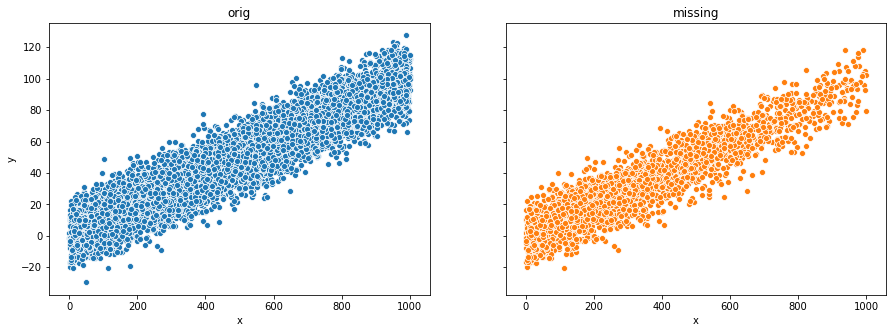

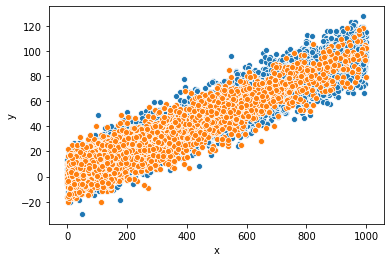

============= MNAR =============
Prop. NaNs:
x    0.4999
y    0.5001
dtype: float64


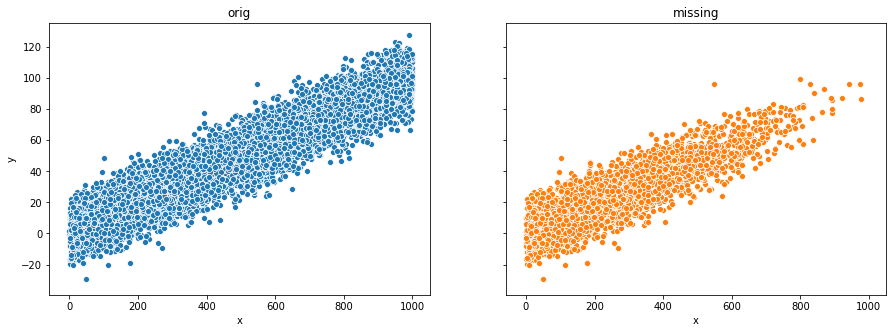

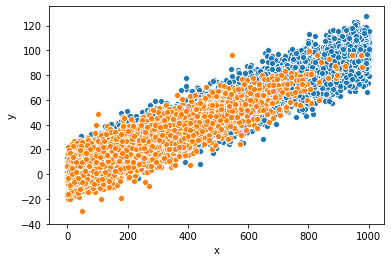

In [4]:
# data = syn_dist.create_gauss_ball(x_mean=1000, x_std=100, y_mean=100, y_std=10, size=10000)
data = syn_dist.create_line(x_range=(0, 1000), intercept=0, slope=0.1, y_std=10, size=10000)

keep_ratio = 0.5
std_noise = 2.

# MCAR
print('============= MCAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MCAR')

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )
plot_dist(data, data_missing)

sns.scatterplot(x='x', y='y', data=data, color=sns.color_palette()[0])
sns.scatterplot(x='x', y='y', data=data_missing, color=sns.color_palette()[1])
plt.show()


# MAR
print('============= MAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MAR', std_noise=std_noise)

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )
plot_dist(data, data_missing)

sns.scatterplot(x='x', y='y', data=data, color=sns.color_palette()[0])
sns.scatterplot(x='x', y='y', data=data_missing, color=sns.color_palette()[1])
plt.show()


# MNAR
print('============= MNAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MNAR', std_noise=std_noise)

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )
plot_dist(data, data_missing)

sns.scatterplot(x='x', y='y', data=data, color=sns.color_palette()[0])
sns.scatterplot(x='x', y='y', data=data_missing, color=sns.color_palette()[1])
plt.show()

In [40]:
from synthesized.testing import UtilityTesting
from synthesized import HighDimSynthesizer

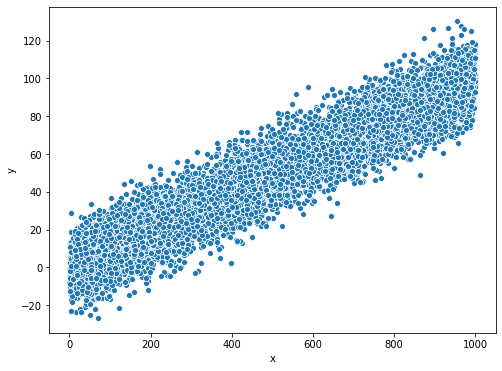

Computed results for 75% NaNs for MCAR. Took 235.73s.
Computed results for 70% NaNs for MCAR. Took 266.74s.
Computed results for 65% NaNs for MCAR. Took 243.29s.
Computed results for 60% NaNs for MCAR. Took 226.30s.
Computed results for 55% NaNs for MCAR. Took 215.83s.
Computed results for 50% NaNs for MCAR. Took 217.36s.
Computed results for 45% NaNs for MCAR. Took 212.16s.
Computed results for 40% NaNs for MCAR. Took 206.68s.
Computed results for 35% NaNs for MCAR. Took 235.31s.
Computed results for 30% NaNs for MCAR. Took 258.40s.
Computed results for 25% NaNs for MCAR. Took 315.27s.
Computed results for 20% NaNs for MCAR. Took 344.07s.
Computed results for 15% NaNs for MCAR. Took 266.16s.
Computed results for 10% NaNs for MCAR. Took 239.46s.
Computed results for 5% NaNs for MCAR. Took 252.44s.
Computed results for 0% NaNs for MCAR. Took 232.10s.


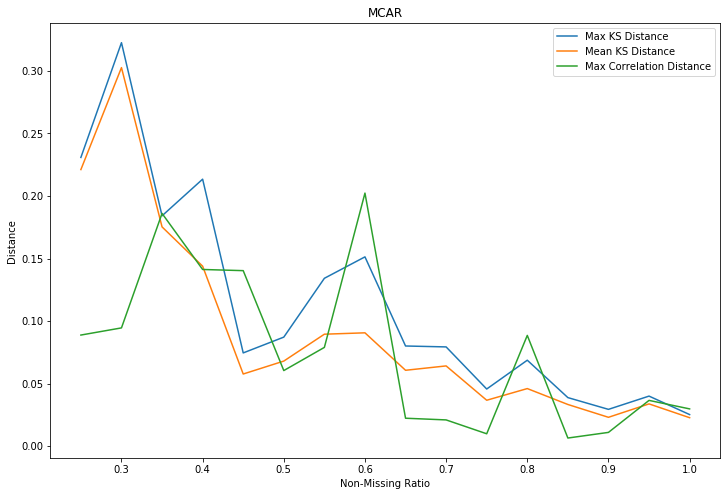

Computed results for 75% NaNs for MAR. Took 213.45s.
Computed results for 70% NaNs for MAR. Took 288.96s.
Computed results for 65% NaNs for MAR. Took 239.23s.
Computed results for 60% NaNs for MAR. Took 214.78s.
Computed results for 55% NaNs for MAR. Took 250.70s.
Computed results for 50% NaNs for MAR. Took 213.49s.
Computed results for 45% NaNs for MAR. Took 211.78s.
Computed results for 40% NaNs for MAR. Took 212.11s.
Computed results for 35% NaNs for MAR. Took 205.30s.
Computed results for 30% NaNs for MAR. Took 285.71s.
Computed results for 25% NaNs for MAR. Took 219.38s.
Computed results for 20% NaNs for MAR. Took 223.08s.
Computed results for 15% NaNs for MAR. Took 239.24s.
Computed results for 10% NaNs for MAR. Took 253.08s.
Computed results for 5% NaNs for MAR. Took 251.83s.
Computed results for 0% NaNs for MAR. Took 260.73s.


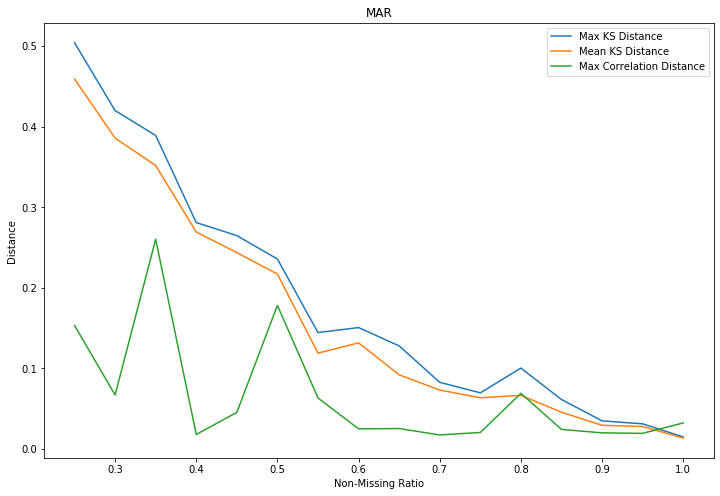

Computed results for 75% NaNs for MNAR. Took 231.03s.
Computed results for 70% NaNs for MNAR. Took 221.68s.
Computed results for 65% NaNs for MNAR. Took 243.44s.
Computed results for 60% NaNs for MNAR. Took 249.04s.
Computed results for 55% NaNs for MNAR. Took 289.77s.
Computed results for 50% NaNs for MNAR. Took 216.55s.
Computed results for 45% NaNs for MNAR. Took 219.47s.
Computed results for 40% NaNs for MNAR. Took 204.51s.
Computed results for 35% NaNs for MNAR. Took 204.47s.
Computed results for 30% NaNs for MNAR. Took 210.11s.
Computed results for 25% NaNs for MNAR. Took 205.56s.
Computed results for 20% NaNs for MNAR. Took 211.89s.
Computed results for 15% NaNs for MNAR. Took 217.72s.
Computed results for 10% NaNs for MNAR. Took 251.92s.
Computed results for 5% NaNs for MNAR. Took 269.29s.
Computed results for 0% NaNs for MNAR. Took 237.25s.


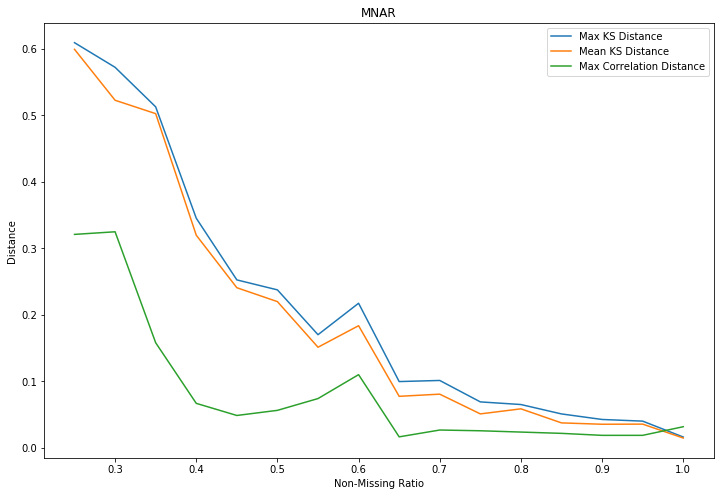

In [47]:
data = syn_dist.create_line(x_range=(0, 1000), intercept=0, slope=0.1, y_std=10, size=10000)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=data)
plt.show()

results = dict()
for mechanism in ['MCAR', 'MAR', 'MNAR']:
    results[mechanism] = synthesize_and_plot_results(
        data, mechanism, n_iter=10000, std_noise = 2., start=25, end=100, step=5, n_experiments=3
    )


In [8]:
data = create_line(x_range=(0, 1000), intercept=0, slope=0.1, y_std=10, size=10000)
data.corr()

,x,y
x,1.000000,0.944888
y,0.944888,1.000000
